In [ ]:
!pip3 install keras
#!pip install --upgrade numpy

In [1]:
from keras import models
from keras import layers
from keras import optimizers
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pylab 
%matplotlib inline
import time
import tensorflow as tf
tf.reset_default_graph()
import h5py
import numpy as np

Using TensorFlow backend.


In [2]:
def loadData():
    with h5py.File('data.h5','r') as hf:
        print('List of arrays in this file: \n', hf.keys())
        allTrain = hf.get('trainData')
        allTest = hf.get('testData')
        npTrain = np.array(allTrain)
        npTest = np.array(allTest)
        print('Shape of the array dataset_1: \n', npTrain.shape)
        print('Shape of the array dataset_2: \n', npTest.shape)
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

x_train, y_train, x_test, y_test = loadData()

List of arrays in this file: 
 KeysView(<HDF5 file "data.h5" (mode r)>)
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)


In [3]:
# Normalize the x_train and x_test dataset
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train", x_train.shape, "y_train", y_train.shape, "x_test", x_test.shape, "y_test", y_test.shape)

x_train (200000, 784) y_train (200000,) x_test (17000, 784) y_test (17000,)


In [13]:
model = models.Sequential()
model.add(layers.Dense(600, activation='relu', input_shape=(784,)))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)         
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer=sgd)
start_time = time.time()
history = model.fit(x_train, y_train, epochs=20, batch_size = 256, validation_split=0.1)
duration = time.time() - start_time
print("Total time is: ", round(duration, 2), "seconds")

Train on 180000 samples, validate on 20000 samples
Epoch 1/20
180000/180000 [==============================] - 10s 58us/step - loss: 0.6915 - acc: 0.8012 - val_loss: 0.5216 - val_acc: 0.8413
Epoch 2/20
180000/180000 [==============================] - 10s 56us/step - loss: 0.4664 - acc: 0.8581 - val_loss: 0.4466 - val_acc: 0.8630
Epoch 3/20
180000/180000 [==============================] - 10s 57us/step - loss: 0.4066 - acc: 0.8757 - val_loss: 0.3993 - val_acc: 0.8761
Epoch 4/20
180000/180000 [==============================] - 10s 57us/step - loss: 0.3661 - acc: 0.8873 - val_loss: 0.3757 - val_acc: 0.8857
Epoch 5/20
180000/180000 [==============================] - 10s 58us/step - loss: 0.3362 - acc: 0.8957 - val_loss: 0.3678 - val_acc: 0.8879
Epoch 6/20
180000/180000 [==============================] - 10s 58us/step - loss: 0.3114 - acc: 0.9035 - val_loss: 0.3446 - val_acc: 0.8945
Epoch 7/20
180000/180000 [==============================] - 10s 58us/step - loss: 0.2912 - acc: 0.9097 - val_

Keys:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


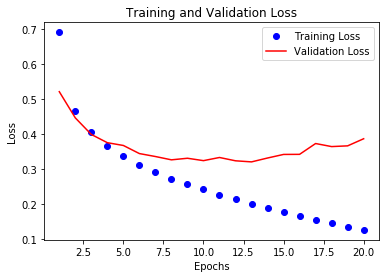

In [14]:
history_dict = history.history
print("Keys: ", history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(history_dict['acc'])+1)

def plot_results(loss_values,val_loss_values, epochs, **kwargs):
  label1 = kwargs.pop('label1')
  plt.plot(epochs, loss_values, 'bo',label = label1)
  label2 = kwargs.pop('label2')
  plt.plot(epochs, val_loss_values, 'r',label = label2)
  title  = kwargs.pop('title')
  xlabel = kwargs.pop('xlabel')
  ylabel = kwargs.pop('ylabel')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()
  
plot_para = {'title': 'Training and Validation Loss', 'xlabel':'Epochs', 'ylabel': 'Loss', 'label1': 'Training Loss', 'label2': 'Validation Loss'}
plot_results(loss_values,val_loss_values, epochs, **plot_para) 

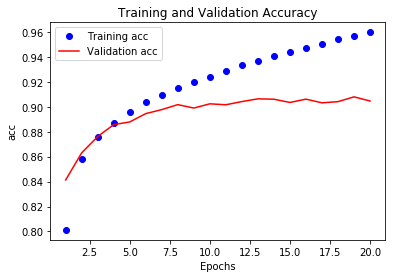

In [15]:
plot_para = {'title': 'Training and Validation Accuracy', 'xlabel':'Epochs', 'ylabel': 'acc', 'label1': 'Training acc', 'label2': 'Validation acc'}
plot_results(acc_values,val_acc_values, epochs, **plot_para) 

In [16]:
results = model.evaluate(x_test, y_test)
print (results)

17000/17000 [==============================] - 1s 32us/step
[0.29991950920037924, 0.924235294117647]
